# **Handout 2: Unsupervised Learning (Problem 3)**
### *Author: Miruna Andreea Gheata*


***

### Table of Contents
   
* [1. Function definitions](#first-bullet1)
   *  [1.1. Plotting functions](#first-first-bullet1)
   *  [1.2. Computing function](#first-second-bullet1)
* [2. Loading the data](#second-bullet1)
* [3. DBSCAN](#third-bullet1)
   *  [3.1. epsilon=0.1, q = 3](#third-first-bullet1)
   *  [3.2. epsilon=0.1, q = 5](#third-second-bullet1)
   *  [3.3. epsilon=0.2, q = 3](#third-third-bullet1)
   *  [3.4. epsilon=0.2, q = 5](#third-fourth-bullet1)
   *  [3.5. epsilon=0.3, q = 3](#third-fifth-bullet1)
   *  [3.6. epsilon=0.3, q = 5](#third-sixth-bullet1)
   *  [3.7. epsilon=0.4, q = 3](#third-seventh-bullet1)
   *  [3.8. epsilon=0.4, q = 5](#third-eight-bullet1)
* [4. Comparing DBSCAN with single-linkage with 2 clusters](#fourth-bullet1)
***


In this exercise we will compare the clustering made with DBSCAN by varying its main parameters ($\epsilon$ and $q$), and comparing the best model with the single-linkage with 2 clusters.

### *0.1. Library imports*

In [1]:
import math
import random
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn import metrics
import pandas as pd
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

## **1. Function definitions** <a class="anchor" id="first-bullet1"></a>

### **1.1. Plotting functions** <a class="anchor" id="first-first-bullet1"></a>

In [2]:
def show_clusters(X, y, labels, algorithm):
    '''
    Plots the DBSCAN clusters.
    '''
    for m in range(0, len(np.unique(labels))):
        plt.scatter(X[labels==m, 0], X[labels==m, 1], s=50, marker='o', c=np.array([random_color()]), label=f"Cluster {m}")
        plt.title(f"Clustering with {algorithm} algorithm\n({len(np.unique(labels))} clusters)")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
    plt.show()

In [3]:
# Plots the data points of each class; if provided, it will also plot the decision boundary
def scatter_plot(X, y, title, xlabel, ylabel):
    '''
    Plots the clusters of points. 
    '''
    plt.figure(1)
    plt.scatter(X[np.where(y == 0)[0]][:,0], X[np.where(y == 0)[0]][:,1], marker='+', color= '#FF4500', label='class 1')
    plt.scatter(X[np.where(y == 1)[0]][:,0], X[np.where(y == 1)[0]][:,1], marker='*', color= '#3CB371', label='class 2')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.axis('equal')
    plt.legend()
    plt.title(title)
    plt.show(block=False)

In [4]:
def random_color():
    '''
    Returns a random RGB color.
    '''
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    return color

### **1.2. Computing functions** <a class="anchor" id="first-second-bullet1"></a>

In [5]:
def dbscan(X, eps, min_samples):
    '''
    Applies the DBSCAN algorithm with the given parameters to find the clusters. 
    '''
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    return db.labels_

In [6]:
def calculate_clusters(X, y, n_clusters, linkage):
    '''
    Finds the clusters by applying AgglomerativeClustering with the given linkage. 
    '''
    model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage=linkage)
    model.fit(X)
    model_labels = model.labels_
    # Plots the predicted clusters.
    show_clusters(X, y, model_labels, linkage)
    # Computes the V-measure. 
    model_vmeasure = metrics.v_measure_score(y.reshape(y.shape[0]).tolist(), model_labels)
    print(f"V-Measure: {model_vmeasure}")
    return model_labels, model_vmeasure

## **2. Loading the data** <a class="anchor" id="second-bullet1"></a>

In [7]:
group = '10'
ds = 4
data = np.loadtxt('datasets10/ds'+group+str(ds)+'.txt')
X = data[:, 0:2]
y = data[:, 2:3]

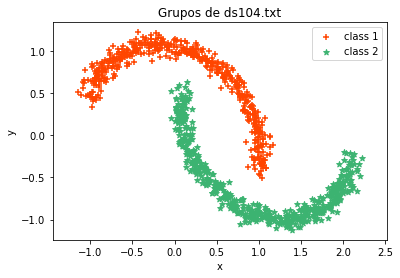

In [8]:
scatter_plot(X, y, "Grupos de ds104.txt", "x", "y")

The dataset has **2 clusters**.

## **3. DBSCAN** <a class="anchor" id="third-bullet1"></a>

### **3.1. $\epsilon = 0.1$, $q = 3$** <a class="anchor" id="third-first-bullet1"></a>

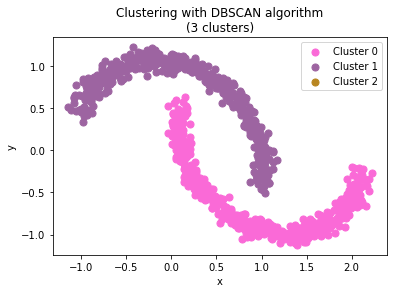

V-Measure: 0.9948234185997589


array([[  1,   0, 499],
       [  0, 500,   0]])

In [9]:
eps = 0.1
min_samples = 3
labels, core_samples_mask = dbscan(X, eps, min_samples)
show_clusters(X, y, labels, "DBSCAN")
model_vmeasure = metrics.v_measure_score(y.reshape(y.shape[0]).tolist(), labels)
print(f"V-Measure: {metrics.v_measure_score(y.reshape(y.shape[0]).tolist(), labels)}")
cm = contingency_matrix(y.reshape(y.shape[0]).tolist(), labels)
cm

The algorithm has predicted 3 clusters but one of the clusters has only one point. The V-measure is also high.

### **3.2. $\epsilon = 0.1$, $q = 5$** <a class="anchor" id="third-second-bullet1"></a>

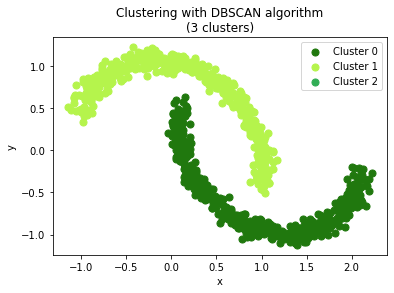

V-Measure: 0.9886992706958839


array([[  1,   0, 499],
       [  1, 499,   0]])

In [10]:
eps = 0.1
min_samples = 5
labels, core_samples_mask = dbscan(X, eps, min_samples)
show_clusters(X, y, labels, "DBSCAN")
print(f"V-Measure: {metrics.v_measure_score(y.reshape(y.shape[0]).tolist(), labels)}")
cm = contingency_matrix(y.reshape(y.shape[0]).tolist(), labels)
cm

The algorithm has predicted 3 clusters but one of the clusters has only 2 points. The V-measure has decreased when compared to the previous model.

### **3.3. $\epsilon = 0.2$, $q = 3$** <a class="anchor" id="third-third-bullet1"></a>

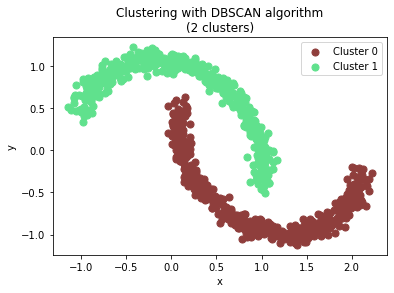

V-Measure: 1.0


array([[  0, 500],
       [500,   0]])

In [11]:
eps = 0.2
min_samples = 3
labels, core_samples_mask = dbscan(X, eps, min_samples)
show_clusters(X, y, labels, "DBSCAN")
print(f"V-Measure: {metrics.v_measure_score(y.reshape(y.shape[0]).tolist(), labels)}")
cm = contingency_matrix(y.reshape(y.shape[0]).tolist(), labels)
cm

The algorithm has predicted 2 clusters. Maximum V-measure.

### **3.4. $\epsilon = 0.2$, $q = 5$** <a class="anchor" id="third-fourth-bullet1"></a>

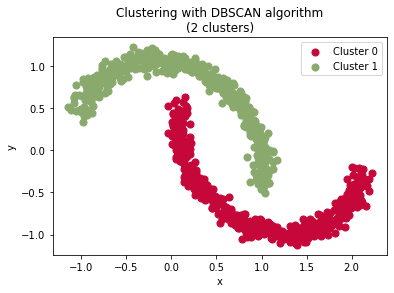

V-Measure: 1.0


array([[  0, 500],
       [500,   0]])

In [12]:
eps = 0.2
min_samples = 5
labels, core_samples_mask = dbscan(X, eps, min_samples)
show_clusters(X, y, labels, "DBSCAN")
print(f"V-Measure: {metrics.v_measure_score(y.reshape(y.shape[0]).tolist(), labels)}")
cm = contingency_matrix(y.reshape(y.shape[0]).tolist(), labels)
cm

The algorithm has predicted 2 clusters. Maximum V-measure. It seems that $\epsilon=0.2$ given the best results for the given dataset.

### **3.5. $\epsilon = 0.3$, $q = 3$** <a class="anchor" id="third-fifth-bullet1"></a>

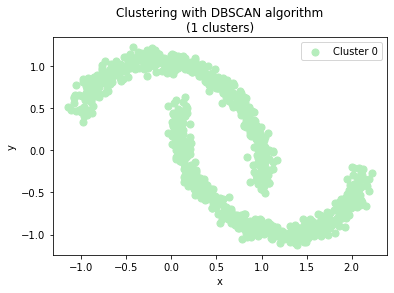

V-Measure: 0.0


array([[500],
       [500]])

In [13]:
eps = 0.3
min_samples = 3
labels, core_samples_mask = dbscan(X, eps, min_samples)
show_clusters(X, y, labels, "DBSCAN")
print(f"V-Measure: {metrics.v_measure_score(y.reshape(y.shape[0]).tolist(), labels)}")
cm = contingency_matrix(y.reshape(y.shape[0]).tolist(), labels)
cm

The algorithm has predicted 1 cluster. 0 V-measure.

### **3.6. $\epsilon = 0.3$, $q = 5$** <a class="anchor" id="third-sixth-bullet"></a>

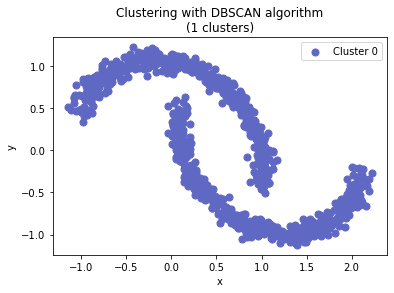

V-Measure: 0.0


array([[500],
       [500]])

In [14]:
eps = 0.3
min_samples = 5
labels, core_samples_mask = dbscan(X, eps, min_samples)
show_clusters(X, y, labels, "DBSCAN")
print(f"V-Measure: {metrics.v_measure_score(y.reshape(y.shape[0]).tolist(), labels)}")
cm = contingency_matrix(y.reshape(y.shape[0]).tolist(), labels)
cm

The algorithm has predicted 1 cluster. 0 V-measure.

### **3.7. $\epsilon = 0.4$, $q = 3$** <a class="anchor" id="third-seventh-bullet1"></a>

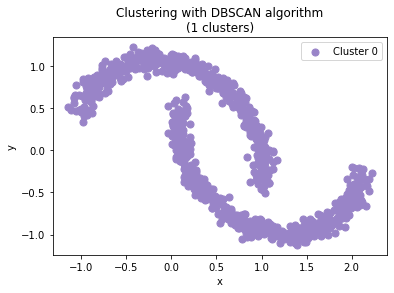

V-Measure: 0.0


array([[500],
       [500]])

In [15]:
eps = 0.4
min_samples = 3
labels, core_samples_mask = dbscan(X, eps, min_samples)
show_clusters(X, y, labels, "DBSCAN")
print(f"V-Measure: {metrics.v_measure_score(y.reshape(y.shape[0]).tolist(), labels)}")
cm = contingency_matrix(y.reshape(y.shape[0]).tolist(), labels)
cm

The algorithm has predicted 1 cluster. 0 V-measure.

### **3.8. $\epsilon = 0.4$, $q = 5$** <a class="anchor" id="third-eight-bullet1"></a>

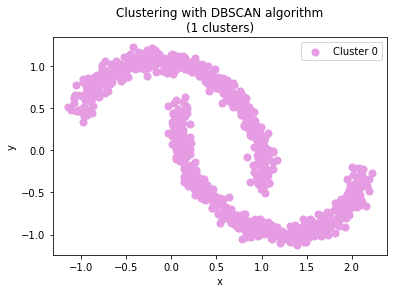

V-Measure: 0.0


array([[500],
       [500]])

In [16]:
eps = 0.4
min_samples = 5
labels, core_samples_mask = dbscan(X, eps, min_samples)
show_clusters(X, y, labels, "DBSCAN")
print(f"V-Measure: {metrics.v_measure_score(y.reshape(y.shape[0]).tolist(), labels)}")
cm = contingency_matrix(y.reshape(y.shape[0]).tolist(), labels)
cm

In conclusion, the best parameters for the DBSCAN model is $\epsilon=0.2$.

The algorithm has predicted 1 cluster. 0 V-measure.

## **4. Comparing DBSCAN with single-linkage with 2 clusters** <a class="anchor" id="fourth-bullet1"></a>

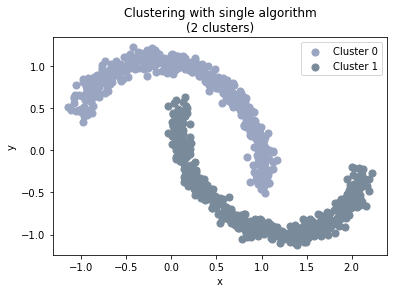

V-Measure: 1.0


array([[500,   0],
       [  0, 500]])

In [18]:
model_single_2_labels, model_single_2_vmeasure = calculate_clusters(X, y, 2, 'single')
cm = contingency_matrix(y.reshape(y.shape[0]).tolist(), model_single_2_labels)
cm

The DBSCAN with $\epsilon=0.2$ and $q = 3, 5$ given the same results as the single-linkage algorithm with 2 clusters.